In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 10

In [58]:
def find_Correlation(ticker_1, ticker_2, start_date, rolling_window, plot=True):
    data_1 = wb.DataReader(ticker_1, data_source='yahoo', start=start_date)['Adj Close'].to_frame()
    data_2 = wb.DataReader(ticker_2, data_source='yahoo', start=start_date)['Adj Close'].to_frame()
    
    df = pd.DataFrame()
    df[ticker_1] = data_1
    df[ticker_2] = data_2

    df.index = pd.DatetimeIndex(df.index) 
    df = df.asfreq('D') 
    df = df.fillna(method='bfill') 

    df['Corr'] = df[ticker_1].rolling(rolling_window).corr(df[ticker_2])
    
    if plot==True:
        plt.plot(df['Corr'])
        plt.plot(data_1)
        plt.plot(data_2)
        plt.title('Running '+ str(rolling_window) +' day Correlation of '+ ticker_1 +' and '+ ticker_2 )
        return
    else:
        return(df)

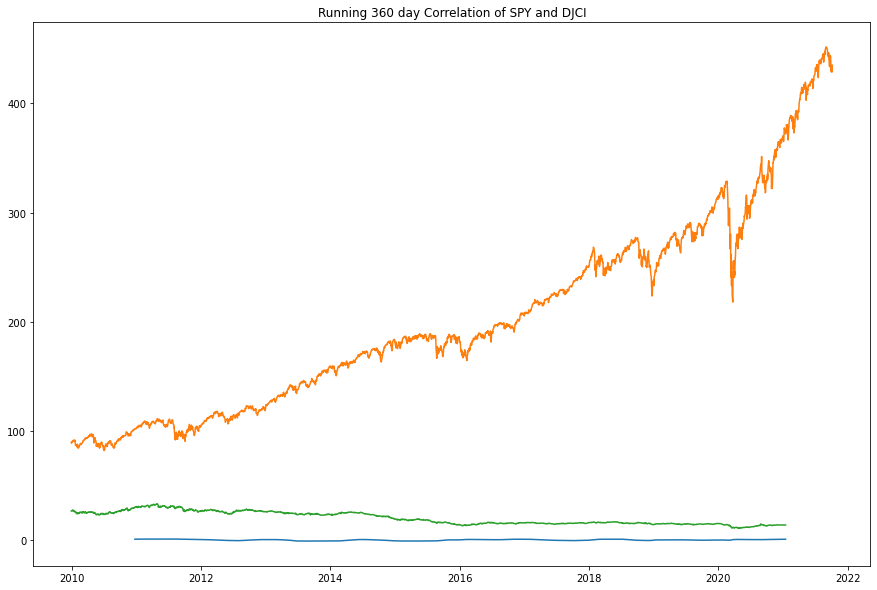

In [61]:
find_Correlation('SPY', 'DJCI', '2009-12-30', 360, plot=True)

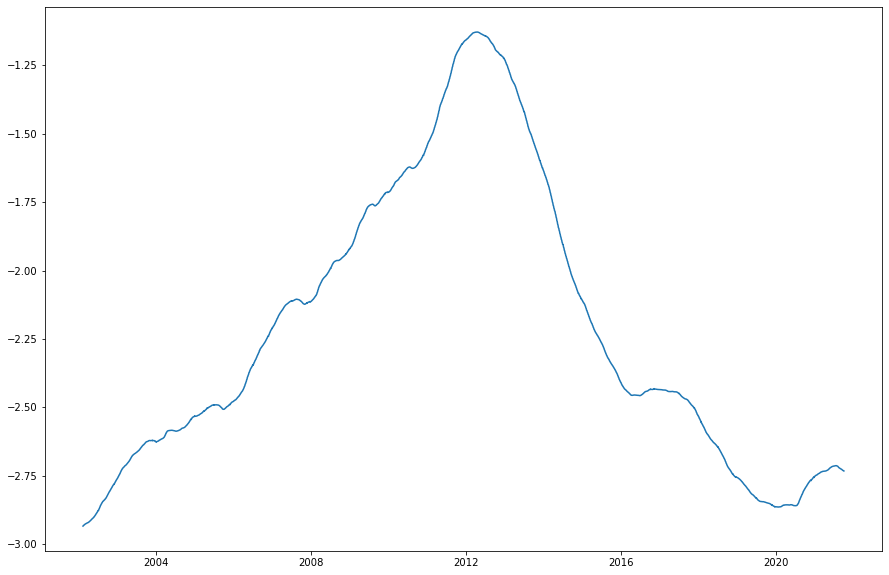

In [13]:
SLV = wb.DataReader('SLV', data_source='yahoo', start='1990-12-30')['Adj Close'].to_frame()
SI = wb.DataReader('SI=F', data_source='yahoo', start='1990-12-30')['Adj Close'].to_frame()
SPY = wb.DataReader('SPY', data_source='yahoo', start='1990-12-30')['Adj Close'].to_frame()
plt.plot(np.log(SI.rolling(360).mean()/SPY.rolling(360).mean()))

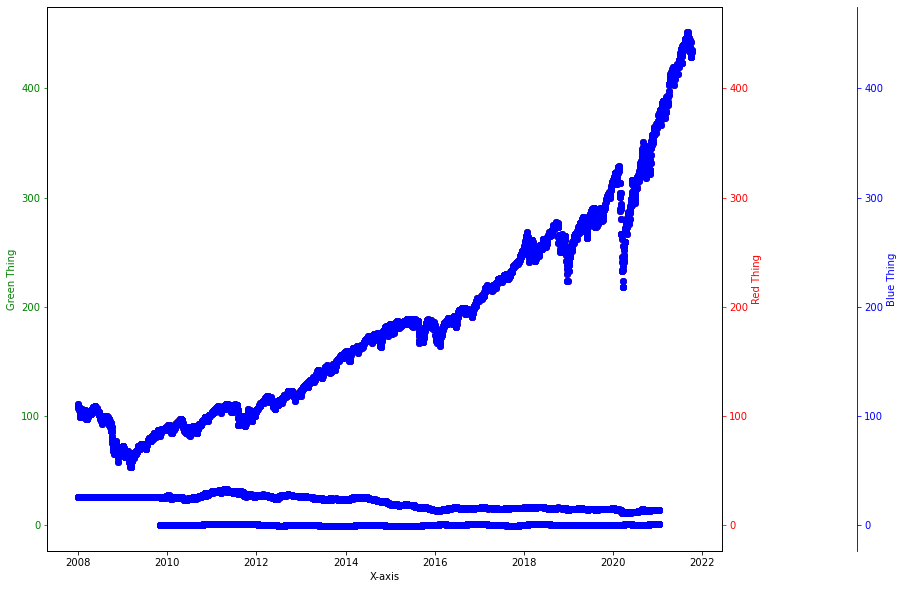

In [45]:
data = find_Correlation('SPY', 'DJCI', '2007-12-30', 360, plot=False)

import matplotlib.pyplot as plt
import numpy as np
# To make things reproducible...
np.random.seed(1977)

fig, ax = plt.subplots()

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx(), ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
axes[-1].spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)

# And finally we get to plot things...
colors = ('Green', 'Red', 'Blue')
for ax, color in zip(axes, colors):
    ax.plot(data, marker='o', linestyle='none', color=color)
    ax.set_ylabel('%s Thing' % color, color=color)
    ax.tick_params(axis='y', colors=color)
axes[0].set_xlabel('X-axis')

plt.show()

ValueError: Axis limits cannot be NaN or Inf

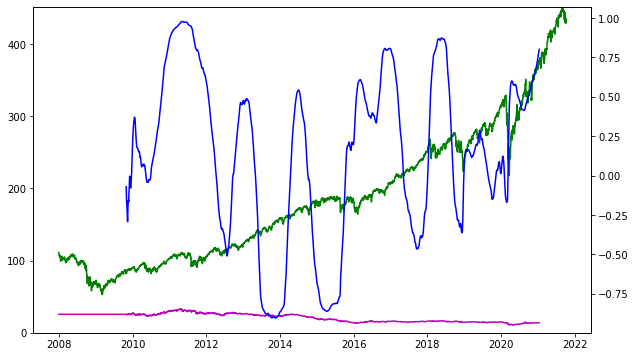

In [54]:
X = data.index
Y1=data[['SPY']]
Y2=data[['DJCI']]
Y3=data[['Corr']]

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

ax1.plot(X, Y1, 'g', label='Curve.1 name') #plotting on primary Y-axis
ax1.plot(X, Y2, 'm', label='Curve.2 name') #plotting on primary Y-axis

ax2.plot(X, Y3, 'b', label='Curve.3 name') #plotting on **second** Y-axis

ax1.set_ylim(0, data['SPY'].max()) #Define limit/scale for primary Y-axis
ax2.set_ylim(0, data['Corr'].max()) #Define limit/scale for secondary Y-axis

plt.show()